<a href="https://colab.research.google.com/github/shrii-varsha/MachineLearningModels/blob/main/Predict_the_Introverts_Extroverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import seaborn as sn
import matplotlib as pyplot
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
from google.colab import files
uploaded = files.upload()


Saving personality_datasert.csv to personality_datasert.csv


In [10]:
df = pd.read_csv('personality_datasert.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [11]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [36]:
encode = LabelEncoder()
label_col = ['Stage_fear','Drained_after_socializing','Personality']
for col in label_col:
  df[col] = encode.fit_transform(df[col])

In [23]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [37]:
X= df.drop(['Personality'],axis=1)
y= df['Personality']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
y_pred = model.predict(X_test)
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

Training Accuracy : 0.9366379310344828
Testing Accuracy : 0.9293103448275862
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



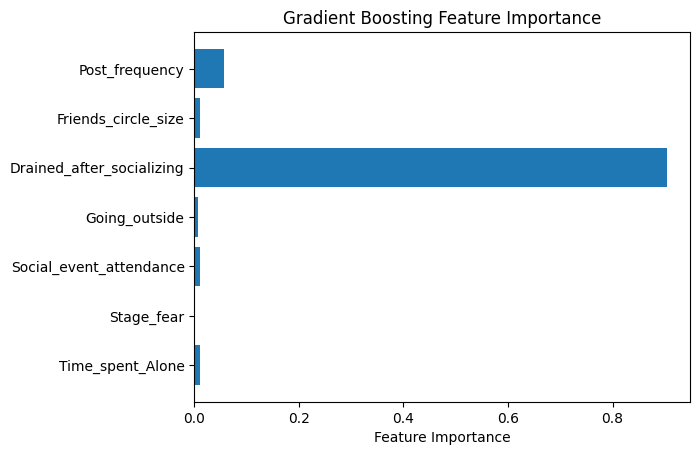

In [45]:
# figure_size = (12, 10)
# plt.figure(figsize=figure_size)
feature_importance = model.feature_importances_
features = X.columns
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()
